<a href="https://colab.research.google.com/github/Nexcauzin/TrabalhoCalcNumerico/blob/main/Trabalho_C%C3%A1lculo_Num%C3%A9rico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Preparando o ambiente para o algoritmo

### Definindo domínio e passo

In [ ]:
Ma_max, Mi_max = 100, 48
h, k = 1, 1
Nx, Ny = int(Ma_max / h) + 1, int(Mi_max / k) + 1

print(f"""
Ma_max = {Ma_max}
Mi_max = {Mi_max}
h = {h}
k = {k}
Nx = {Nx}
Ny = {Ny}
""")


Ma_max = 100
Mi_max = 48
h = 1
k = 1
Nx = 101
Ny = 49



### Condições de contorno

In [ ]:
CP = np.zeros((Nx, Ny)) # Iniciando matriz CP (zerada)

# Condições de contorno abaixo
for i in range(Nx):
    CP[i, 0] = (i * h)**2  # CP(Ma, 0) = Ma^2
    CP[i, -1] = (i * h - 48)**2  # CP(Ma, 48) = (Ma - 48)^2

for j in range(Ny):
    CP[0, j] = (j * k)**2  # CP(0, Mi) = Mi^2
    CP[-1, j] = (j * k - 100)**2  # CP(100, Mi) = (Mi - 100)^2

CP

array([[0.000e+00, 1.000e+00, 4.000e+00, ..., 2.116e+03, 2.209e+03,
        2.304e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.209e+03],
       [4.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.116e+03],
       ...,
       [9.604e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.500e+03],
       [9.801e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.601e+03],
       [1.000e+04, 9.801e+03, 9.604e+03, ..., 2.916e+03, 2.809e+03,
        2.704e+03]])

### Parâmetros

In [ ]:
tolerancia = 1e-6
maximo_iteracoes = 100000
erro = 1
iteracoes = 0

# Iterações do método

In [ ]:
tempo_inicial = time()

while erro > tolerancia and iteracoes < maximo_iteracoes:
    erro = 0
    CP_backup = CP.copy()

    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            CP[i, j] = 0.25 * (CP_backup[i+1, j] + CP_backup[i-1, j] + CP_backup[i, j+1] + CP_backup[i, j-1] - 4)
            erro = max(erro, abs(CP[i, j] - CP_backup[i, j]))

    iteracoes += 1

tempo_final = time()

print(f"Convergiu após {iteracoes} iterações com erro {erro:.6f}")
print(f"Tempo decorrido: {tempo_final-tempo_inicial:.2f}")

Convergiu após 1 iterações com erro 0.000001


# Plot do Resultado

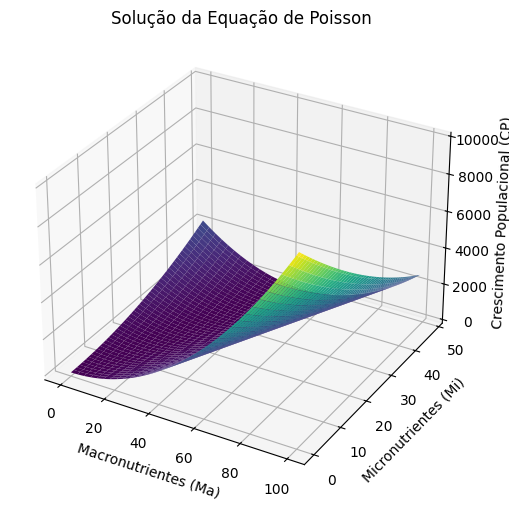

In [ ]:
X, Y = np.meshgrid(np.linspace(0, Ma_max, Nx), np.linspace(0, Mi_max, Ny), indexing='ij')
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, CP, cmap='viridis')
ax.set_xlabel('Macronutrientes (Ma)')
ax.set_ylabel('Micronutrientes (Mi)')
ax.set_zlabel('Crescimento Populacional (CP)')
ax.set_title('Solução da Equação de Poisson')
plt.show()

# Verificando se o resultado condiz com o esperado

### Dimensões do domínio

In [ ]:
Ma_max = 100
Mi_max = 48

### Aplicando condições de contorno